# D209: Data Mining, Task 2
Western Governors University
<br>Bailey Psuik 
<br>January 2024

### Part I: Research Question

**A1. Proposal of question**
<br>For this paper, data from a popular telecommunications company was analyzed. The company has collected data on its customers including demographic information, the services they receive, and customer account information in an effort to analyze their churn rate. Churn is defined as the percentage of customers who have discontinued service with the provider. Industry-wide, annual churn rates can be as high as 25%. The company knows that it is more cost-effective to retain existing customers than to acquire new ones, and therefore seeks to uncover key metrics contained in the customer data they have collected.

One factor that may influence a customer’s decision to discontinue their service is how much data they use–- their bandwidth. The company measures usage data in gigabytes (GB) per year. This report will build a random forest regression model to answer the following question: **Can bandwidth usage be predicted by customer demographics, account information, and chosen services?**

**A2. Defined goal**
<br>The goal of this report is two-fold: Build a random forest regression model to predict how much bandwidth, in GB, a customer will use annually based on information regarding their demographics, account, and chosen services; make recommendations to the telecommuncations company based on these findings.

### Part II: Method Justification

**B1. Explanation of prediction method**
<br> The random forest technique is a supervised ensemble learning method, meaning it aggregates predictions from multiple estimators. The estimators used in random forest are decision trees. When the target variable for the model is numeric, such as Bandwidth_GB_year, random forest regression is used to create *n* individual decision trees, and output the average of each of those *n* decision trees, resulting in one single predicted value. 

To break this process down further, the basic step-by-step process for building a random forest regression model is as follows (Sruthi E. R., 2024): 
1. Samples of *n* random records and *m* features are taken from a data set with *k* records. These are called bootstrap samples.
2. *n* decision trees are built -- one for each bootstrap sample.
3. The output values of each of *n* decision trees are averaged. This average value is the final output of the random forest regression model.

The reason for aggregating the predicted values of multiple decision trees is to mitigate overfitting of the model. Individual decision trees are at risk for overfitting, as the data randomly selected to build them may have noise or outliers that other random samples do not contain. Averaging out the values of multiple decision trees helps to mitigate this problem. 

Averaging the results of decision trees in this way to create a random forest regression model results in expected outcomes that are more accurate than they would be if an individual decision tree was used.

**B2. Summary of method assumption**
<br>An assumption of random forest models is that the data used to construct the models is actual data, and not estimated values (Alma Better, n.d.). This assumption is made so that the output of the model can be considered as accurate as possible. 

The data set being used to create the model in this report is said to be gathered directly from the telecommunications company, so there is reason to believe that the values it contains are accurate and not simply estimates. Thus, the assumption holds true.

**B3. Packages list** 

* **Pandas**: used for data importing/exporting and dataframe creation
* **Numpy**: used for working with arrays and matrices
* **Matplotlib** and **Seaborn**: both used to create visualizations
* Various functions from **scikit-learn (sklearn)**: 
    * **LabelEncoder** from **sklearn.preprocessing**: used in re-expressing categorical values to numeric values
    * **train_test_split** from **sklearn.model_selection**: used to split the data set into a training set and testing set
    * **RandomForestRegressor** from **sklearn.ensemble**: used to build and fit the model
    * **mean_squared_error** from **sklearn.metrics**: used to compute the mean squared error (MSE) of the model
    * **GridSearchCV** from **sklearn.model**: used for hyperparameter tuning

### Part III: Data Preparation

**C1. Data pre-processing**
<br>In order for this data set to be prepared for model building, the data must be pre-processed to get it into proper format for analysis. A crucial step in data pre-processing for creation of this random forest regression model is re-expressing each categorical predictor variable's values as numeric ones. The main goal here is to re-express the values for the predictor variables, which were originally encoded with string values of "Yes" and "No", as numeric values with all "Yes" values as 1s, and all "No" values as 0s. 

**C2. Data set variables** 
<br>The model being created in this report will predict bandwidth usage for the company's customers, thus "Bandwidth_GB_Year" is the dependent, or target, variable here. The predictor variables that will be included are listed below as well. 

Target variable:
* Bandwidth_GB_Year *(numeric)*

Predictor variables: 
* Children *(numeric)*
* Age *(numeric)*
* Income *(numeric)*
* Outage_sec_perweek *(numeric)*
* Yearly_equip_failure *(numeric)*
* Techie *(categorical)*
* Tablet *(categorical)*
* Phone *(categorical)*
* Multiple *(categorical)*
* StreamingTV *(categorical)*
* StreamingMovies *(categorical)*
* Tenure *(numeric)*
* MonthlyCharge *(numeric)*

**C3. Steps for analysis**
<br>Before moving forward with the building of the model, the data set must be cleaned. Skipping this vital step could result in a faulty or misleading answer to the research question posed in section A1. Goals of the data cleaning process include: 
* Perform an initial inspection of the data to get the number of rows, columns, and data types
* Identify and treat duplicate values
* Convert categorical variables to numerical variables
* Identify and treat missing values
* Identify and treat outliers

The steps used to clean the data are as follows: 
<br><br>Step 1: Perform an initial inspection of the data with the .info() function. 
* Outcome: The data contains 10,000 rows and 50 columns. All variables but one, InternetService, have 10,000 non-null values. Data types of each variable are logical.

<br>Step 2: Compute a sum of the number of total duplicates contained in the data set. Additionally, since 'Customer_id' is denoted as being a unique identifier, compute the sum of duplicates in this column.
* Outcome: No duplicates were found, so no treatment was needed.

<br>Step 3: Re-express ordinal categorical variables as numerical variables.
* Outcome: 14 ordinal categorical variables had their values replaced with numerical values to prepare this data set for analysis.

<br>Step 4: Re-encode nominal categorical variables with label encoding.
* Outcome: Values for Gender and InternetService, each of which have three unique values, are nominally encoded.

<br>Step 5: Treat the missing values in ‘InternetService’ detected from the initial inspection of the data.
* Outcome: The 2,129 null values found in this column were filled in using imputation of the mode, as ‘InternetService’ is a categorical variable.

<br>Step 6: Visually inspect the box plots for each quantitative variable to identify outliers. 
* Outcome: Outliers were detected in nine quantitative variables, but these values were deemed acceptable for various reasons, and were therefore retained.

<br>Complete code for the data cleaning/pre-processing portion of this analysis is below.

In [2]:
# Initial package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# .csv import
churn_data = pd.read_csv("C:/Users/psuik/Desktop/WGU/D209/churn_clean.csv")

# Step 1: Profile the data for initial inspection
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [3]:
# Step 2: Identify and treat duplicate values

# Return duplicate values as True, non-duplicates as False
print(churn_data.duplicated())

# Get total counts of duplicate values
print(churn_data.duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
False    10000
Name: count, dtype: int64


In [4]:
# True = duplicate, False = non-duplicate
# 10,000 False values ==> No complete duplicates exist 

# Check for duplicate values in Customer_id column, since this is denoted as a unique identifier
print(churn_data['Customer_id'].duplicated())
print(churn_data['Customer_id'].duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Customer_id, Length: 10000, dtype: bool
Customer_id
False    10000
Name: count, dtype: int64


In [5]:
# Step 3: Re-express ordinal categorical variables as numerical variables 

# Get unique values for each ordinal categorical variable
## Items 1-8 have ordinal values, but are already numerically encoded, so they will not be included
print("TimeZone:",churn_data.TimeZone.unique())
print("Churn:",churn_data.Churn.unique())
print("Techie:",churn_data.Techie.unique())
print("Port_modem:",churn_data.Port_modem.unique())
print("Tablet:",churn_data.Tablet.unique())
print("Phone:",churn_data.Phone.unique())
print("Multiple:",churn_data.Multiple.unique())
print("OnlineSecurity:",churn_data.OnlineSecurity.unique())
print("OnlineBackup:",churn_data.OnlineBackup.unique())
print("DeviceProtection:",churn_data.DeviceProtection.unique())
print("TechSupport:",churn_data.TechSupport.unique())
print("StreamingTV:",churn_data.StreamingTV.unique())
print("StreamingMovies:",churn_data.StreamingMovies.unique())
print("PaperlessBilling:",churn_data.PaperlessBilling.unique())

TimeZone: ['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']
Churn: ['No' 'Yes']
Techie: ['No' 'Yes']
Port_modem: ['Yes' 'No']
Tablet: ['Yes' 'No']
Phone: ['Yes' 'No']
Multiple: ['No' 'Yes']
OnlineSecurity: ['Yes' 'No']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['Yes' 'No']
PaperlessBilling: ['Yes' 'No']


In [6]:
# Replicate the variables to prepare for replacing categorical values with numeric ones
churn_data['TimeZone_num']=churn_data['TimeZone']
churn_data['Churn_num']=churn_data['Churn']
churn_data['Techie_num']=churn_data['Techie']
churn_data['Port_modem_num']=churn_data['Port_modem']
churn_data['Tablet_num']=churn_data['Tablet']
churn_data['Phone_num']=churn_data['Phone']
churn_data['Multiple_num']=churn_data['Multiple']
churn_data['OnlineSecurity_num']=churn_data['OnlineSecurity']
churn_data['OnlineBackup_num']=churn_data['OnlineBackup']
churn_data['DeviceProtection_num']=churn_data['DeviceProtection']
churn_data['TechSupport_num']=churn_data['TechSupport']
churn_data['StreamingTV_num']=churn_data['StreamingTV']
churn_data['StreamingMovies_num']=churn_data['StreamingMovies']
churn_data['PaperlessBilling_num']=churn_data['PaperlessBilling']

In [7]:
# Create dictionaries for conversion. 
## *TimeZones are ranked ordinally based on a 1 hour difference relative to Puerto Rico

dict_TimeZone = {"America/Puerto_Rico": 1, 
                 "America/Detroit": 2,
                 "America/New_York": 2,
                 "America/Indiana/Indianapolis": 2, 
                 "America/Kentucky/Louisville": 2, 
                 "America/Indiana/Petersburg": 2, 
                 "America/Toronto": 2, 
                 "America/Indiana/Winamac": 2,
                 "America/Indiana/Vincennes": 2, 
                 "America/Indiana/Marengo": 2,
                 "America/Chicago": 3,
                 "America/Menominee": 3,
                 "America/Indiana/Knox": 3,
                 "America/North_Dakota/New_Salem": 3,
                 "America/Indiana/Tell_City": 3,
                 "America/Denver": 4,
                 "America/Phoenix": 4,
                 "America/Boise": 4,
                 "America/Ojinaga": 4,
                 "America/Los_Angeles": 5,
                 "America/Sitka": 6,
                 "America/Nome": 6,
                 "America/Anchorage": 6,
                 "America/Juneau": 6,
                 "Pacific/Honolulu": 7}
dict_Churn = {"No":0, "Yes":1}
dict_Techie = {"No":0, "Yes":1}
dict_Port_modem = {"No":0, "Yes":1}
dict_Tablet = {"No":0, "Yes":1}
dict_Phone = {"No":0, "Yes":1}
dict_Multiple = {"No":0, "Yes":1}
dict_OnlineSecurity = {"No":0, "Yes":1}
dict_OnlineBackup = {"No":0, "Yes":1}
dict_DeviceProtection = {"No":0, "Yes":1}
dict_TechSupport = {"No":0, "Yes":1}
dict_StreamingTV = {"No":0, "Yes":1}
dict_StreamingMovies = {"No":0, "Yes":1}
dict_PaperlessBilling = {"No":0, "Yes":1}

In [8]:
# Replace values from dictionaries
churn_data['TimeZone_num'].replace(dict_TimeZone, inplace=True)
churn_data['Churn_num'].replace(dict_Churn, inplace=True)
churn_data['Techie_num'].replace(dict_Techie, inplace=True)
churn_data['Port_modem_num'].replace(dict_Port_modem, inplace=True)
churn_data['Tablet_num'].replace(dict_Tablet, inplace=True)
churn_data['Phone_num'].replace(dict_Phone, inplace=True)
churn_data['Multiple_num'].replace(dict_Multiple, inplace=True)
churn_data['OnlineSecurity_num'].replace(dict_OnlineSecurity, inplace=True)
churn_data['OnlineBackup_num'].replace(dict_OnlineBackup, inplace=True)
churn_data['DeviceProtection_num'].replace(dict_DeviceProtection, inplace=True)
churn_data['TechSupport_num'].replace(dict_TechSupport, inplace=True)
churn_data['StreamingTV_num'].replace(dict_StreamingTV, inplace=True)
churn_data['StreamingMovies_num'].replace(dict_StreamingMovies, inplace=True)
churn_data['PaperlessBilling_num'].replace(dict_PaperlessBilling, inplace=True)

In [9]:
# Step 4: Re-encode nominal categorical variables with label encoding.
from sklearn.preprocessing import LabelEncoder

# Fit the label encoder to categorical data for Gender and Internet Service
label_encoder_gender = LabelEncoder()
churn_data['Gender_num'] = label_encoder_gender.fit_transform(churn_data['Gender'])
churn_data['Gender_decoded'] = label_encoder_gender.inverse_transform(churn_data['Gender_num'])

label_encoder_internet = LabelEncoder()
churn_data['InternetService_num'] = label_encoder_gender.fit_transform(churn_data['InternetService'])
churn_data['InternetService_decoded'] = label_encoder_gender.inverse_transform(churn_data['InternetService_num'])

label_encoder_internet = LabelEncoder()
churn_data['Contract_num'] = label_encoder_gender.fit_transform(churn_data['Contract'])
churn_data['Contract_decoded'] = label_encoder_gender.inverse_transform(churn_data['Contract_num'])

label_encoder_state = LabelEncoder()
churn_data['State_num'] = label_encoder_gender.fit_transform(churn_data['State'])
churn_data['State_decoded'] = label_encoder_gender.inverse_transform(churn_data['State_num'])

label_encoder_area = LabelEncoder()
churn_data['Area_num'] = label_encoder_gender.fit_transform(churn_data['Area'])
churn_data['Area_decoded'] = label_encoder_gender.inverse_transform(churn_data['Area_num'])

label_encoder_marital = LabelEncoder()
churn_data['Marital_num'] = label_encoder_gender.fit_transform(churn_data['Marital'])
churn_data['Marital_decoded'] = label_encoder_gender.inverse_transform(churn_data['Marital_num'])

label_encoder_paymentmethod = LabelEncoder()
churn_data['PaymentMethod_num'] = label_encoder_gender.fit_transform(churn_data['PaymentMethod'])
churn_data['PaymentMethod_decoded'] = label_encoder_gender.inverse_transform(churn_data['PaymentMethod_num'])

In [10]:
# Step 5: Identify and treat missing values 

# Initial inspection of the data shows that only 7,871 out of 10,000 values for InternetService are non-null values
# This means there are 2,129 missing values in this column that must be imputed

# Imputation will be completed using the mode of 'InternetService', a nominal categorical variable
mode_InternetService = churn_data['InternetService'].mode()[0]

# Fill all null values in InternetService with the mode
churn_data['InternetService'] = churn_data['InternetService'].fillna(mode_InternetService)

# Confirm all missing values have been filled by returning the sum of null values in InternetService & InternetService_num
print(churn_data['InternetService'].isnull().sum())
print(churn_data['InternetService_num'].isnull().sum())

0
0


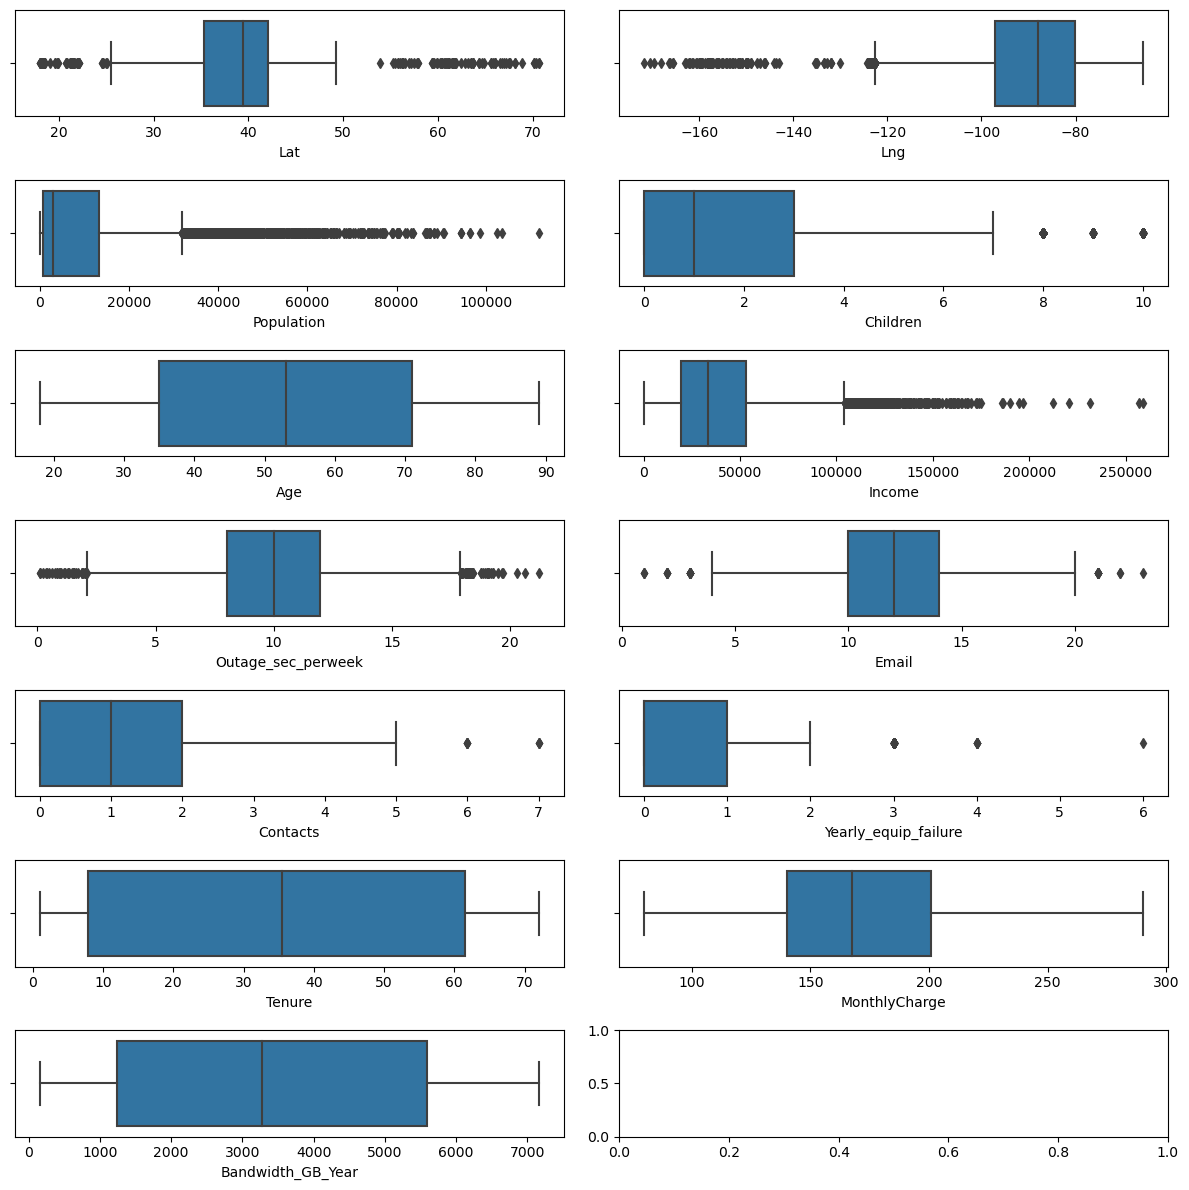

In [11]:
# Step 6: Identify and treat outliers

# Visually show outliers for each quantitative variable on respective box plots
# Import seaborn
import seaborn as sns

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))

plt.subplot(7, 2, 1)
sns.boxplot(x='Lat', data = churn_data)

plt.subplot(7, 2, 2)
sns.boxplot(x='Lng', data = churn_data)

plt.subplot(7, 2, 3)
sns.boxplot(x='Population', data = churn_data)

plt.subplot(7, 2, 4)
sns.boxplot(x='Children', data = churn_data)

plt.subplot(7, 2, 5)
sns.boxplot(x='Age', data = churn_data)

plt.subplot(7, 2, 6)
sns.boxplot(x='Income', data = churn_data)

plt.subplot(7, 2, 7)
sns.boxplot(x='Outage_sec_perweek', data = churn_data)

plt.subplot(7, 2, 8)
sns.boxplot(x='Email', data = churn_data)

plt.subplot(7, 2, 9)
sns.boxplot(x='Contacts', data = churn_data)

plt.subplot(7, 2, 10)
sns.boxplot(x='Yearly_equip_failure', data = churn_data)

plt.subplot(7, 2, 11)
sns.boxplot(x='Tenure', data = churn_data)

plt.subplot(7, 2, 12)
sns.boxplot(x='MonthlyCharge', data = churn_data)

plt.subplot(7, 2, 13)
sns.boxplot(x='Bandwidth_GB_Year', data = churn_data)

plt.tight_layout()

After evaluation of each count and range of outliers for the variables, it was determined that none of the outliers should be removed, as each outlier is within an acceptable or justifiable range, implying that their input is valid and was not cause of mistake or human error. Below is the justification for retention of the data set’s outliers: 
* Lat & Lng: Customers are from all over the country, so these values may be accurate as customers are more densely populated in some areas. There are no latitudes or longitudes off on their own in the boxplot so there is no cause to question these values.
* Population: Customers are from all over the country, so 100,000 is a very reasonable population number when many cities in the US have over 1,000,000 residents.
* Children: Customers are from all over the country, so 100,000 is a very reasonable population number when many cities in the US have over 1,000,000 residents.
* Income: The maximum value is just over $250k, which is a reasonable income amount.
* Outage_sec_perweek: There are many outliers here which makes sense—there are likely some customers who experience little to no outages in the average week, making up the lower range of outliers. On the other hand, if one customer is experiencing an outage, those in a certain radius of them would likely also experience an outage, explaining the high number of upper-range outliers here too. This explains the wide range of outlier values here too.
* Email: The upper and lower range of outliers here does not present anything out of the question. 
* Contacts: The upper and lower range of outliers here does not present anything out of the question. 
* Yearly_equip_failure: The maximum number of times someone’s equipment failed this year is 6, which is unfortunate, but possible.

**C4. Cleaned data set**
<br>The prepared data set is downloadable via the code below.

In [12]:
churn_data.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/churn_clean_D209p2.csv")

### Part IV: Analysis

**D1. Splitting the data**
<br> Before the data is split, a new data frame containing only the predictor variables relevant to this model is created. 

In [13]:
# New dataframe containing only the dependent variable and selected explanatory variables
df = churn_data[['Bandwidth_GB_Year', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure',
               'Tenure', 'MonthlyCharge', 'Techie_num', 'Tablet_num', 'Phone_num' , 'Multiple_num', 
                 'StreamingTV_num', 'StreamingMovies_num']].copy()
df.head()

,Bandwidth_GB_Year,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Techie_num,Tablet_num,Phone_num,Multiple_num,StreamingTV_num,StreamingMovies_num
0,904.536110,0,68,28561.99,7.978323,1,6.795513,172.455519,0,1,1,0,0,1
1,800.982766,1,27,21704.77,11.699080,1,1.156681,242.632554,1,1,1,1,1,1
2,2054.706961,4,50,9609.57,10.752800,1,15.754144,159.947583,1,0,1,1,0,1
3,2164.579412,1,48,18925.23,14.913540,0,17.087227,119.956840,1,0,1,0,1,0
4,271.493436,0,83,40074.19,8.147417,1,1.670972,149.948316,0,0,0,0,1,0


In [15]:
# X and y are defined from this newly created reduced dataframe, df: 
X = df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure',
               'Tenure', 'MonthlyCharge', 'Techie_num', 'Tablet_num', 'Phone_num' , 'Multiple_num', 
                 'StreamingTV_num', 'StreamingMovies_num']]
y = df[['Bandwidth_GB_Year']]
y = y.values.ravel()

In [16]:
# Splitting the data (Kawerk, n.d.) 

# Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Set seed for reproducability
SEED = 1 

# A standard 80/20 split will be used, placing 80% of data into the training set, and 20% into the test set
    # This is denoted by test_size=0.2, specifying this proportion
# The random_state kwarg sets a seed for the random number generator
    # Using this same seed later allows for this same split to be reproduced later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [17]:
# The split files for download are obtained by executing the code below: 
X_train.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/X_train_D209p2.csv") 
X_test.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/X_test_D209p2.csv") 

y_train_df = pd.DataFrame(y_train, columns=["Bandwidth_GB_Year"])
y_test_df = pd.DataFrame(y_train, columns=["Bandwidth_GB_Year"])

y_train_df.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/y_train_D209p2.csv") 
y_test_df.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/y_test_D209p2.csv") 

**D2. Output and intermediate calculations**
<br>Now that the data has been split into a training and a testing set, the model will be built on the training data, and tested on the testing data. The code to construct the model is found below in section D3. Intermediate calculations for computing the model's accuracy, mean squared error, feature importance, and hyperparameter tuning are included in the following section, E1.

**D3. Code execution**
<br> The random forest regression model is built using the code below.

In [18]:
# (Kawerk, n.d.)

# Import RandomForestRegressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Instantiate the random forest regressor and store as 'rf'
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf=0.12, random_state=SEED)
# n_estimators = 400 means there are 400 regression trees

# Fit (train) the model using the training data obtained from using the train_test_split() function previously
rf.fit(X_train, y_train)

# Predict the values of the test set
y_pred = rf.predict(X_test)

### Part V: Data Summary and Implications

**E1. Accuracy and MSE**
<br>The default metric for accuracy of regression models is the R-squared value (Bowne-Anderson, n.d.). This value indicates the amount of variance in the target variable, Bandwidth_GB_year, that is predicted from the feature variables included in the model. R-squared values range from 0 to 1, with 0 indicating no variability explained in the model, and 1 indicating a perfect fit. Thus, the higher the R-squared value, the better the model is at predicting accurate outcomes. 

The mean squared error (MSE) of a model is the average of the square of the difference between the actual values and the estimated values from the model (Great Learning, 2022). In other words, the MSE is a metric for how close the estimated values are to the actual values. As MSE indicates the amount that estmated values are off by, the closer the MSE is to 0, the better the model. 

The accuracy and MSE of the model constructed in section D3 are computed below: 

In [19]:
# Accuracy and MSE before hyperparameter tuning:
from sklearn.metrics import mean_squared_error as MSE

print("R-squared of rf:", rf.score(X_test, y_test))

mse_test = MSE(y_test, y_pred)
print("Test set MSE of rf: {:.2f}".format(mse_test))

R-squared of rf: 0.9628687055601743
Test set MSE of rf: 179447.81


An R-squared value of 0.962 indicates that the model is highly accurate. However, the MSE of this model is quite high. As 179,447.81 is well above 0, this indicates that the model's estimated values are not close to the actual values in the data set.

Before these metrics are considered final, hyperparameter tuning will be performed in an attempt to improve these values.

In [20]:
# Hyperparameter tuning (Kawerk, n.d.)
from sklearn.model_selection import GridSearchCV

# Define a dictionary with ranges of values for each of the parameters used in the model
params_rf = {'n_estimators': [300, 400, 500],
             'min_samples_leaf': [0.10, 0.12, 0.14]}

# Instantiate a GridSearchCV object, passing the dictionary defined above as the parameters grid
# This will perform 3-fold cross-validation
# The scoring metric being used is the negative mean squared error
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=3, 
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(min_samples_leaf=0.12,
                                             n_estimators=400, random_state=1),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [0.1, 0.12, 0.14],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [21]:
# Extract the best-performing hyperparameters from grid_rf and print them
best_hyperparams = grid_rf.best_params_
print("Best hyperparameters:", best_hyperparams)

Best hyperparameters: {'min_samples_leaf': 0.1, 'n_estimators': 500}


In [29]:
# Re-define the random forest regressor using the best hyperparameters from above
## Call the updated regressor rf_best
rf_best = RandomForestRegressor(n_estimators = 500, min_samples_leaf=0.1, random_state=SEED)

# Fit (train) rf_best using the training data obtained from using the train_test_split() function previously
rf_best.fit(X_train, y_train)

# Predict the values of the test set using the newly trained rf_best
## Create a new y_pred, called y_pred_best
y_pred_best = rf_best.predict(X_test)

Now that the hyperparameters for the model have been tuned, the accuracy and MSE will be re-calculated for the updated model.

In [30]:
# Accuracy and MSE after hyperparameter tuning:

print("R-squared of rf_best:", rf_best.score(X_test, y_test))

# y_pred_best replaces y_pred in the MSE calculation
mse_test_best = MSE(y_test, y_pred_best)
print("Test set MSE of rf_best: {:.2f}".format(mse_test_best))

R-squared of rf_best: 0.9699266292834772
Test set MSE of rf_best: 145338.34


Tuning the model's hyperparameters results in a slighly improved R-squared value of 0.969. This indicates that tuning the hyperparameters allows for the predictor variables used in the model to better explain the variance in Bandwidth_GB_Year.

The model's MSE decreased after hyperparameter tuning, although only slightly. Seeing as though the optimal MSE value is 0, which would indicate a perfect model, a value of 145,338.34 is still well above 0. This indicates that the tuned model is still error-prone, albeit slighly less than the model built on the original hyperparameters. 

In an effort to uncover the reason for such a high MSE value, the feature importance of the model's predictor variables will be inspected.

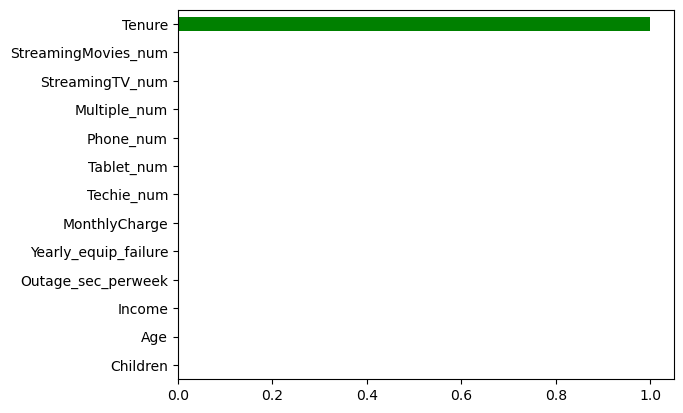

In [62]:
# Feature importance (Kawerk, n.d.)

# Create a pd.Series of feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Visualize with a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='green')
plt.show()

As seen in the bar plot above, Tenure is the only predictor variable of any importance in this model. This could explain the inflated MSE value, as MSE is closely tied to the ordinary least squares (OLS) for a model. If a model is built on data that is uninformative, it could result in a high level of variance due to the fact that the data does not accurately inform the model on how to predict on unseen data. If most of the features included in the model are merely noise, as is the case here, the model will not be well-trained and thus will have a high rate of variance.

**E2. Results and implications**

Though the R-squared value indicates a good fit, the tuned model's high MSE value points to a high level of error in the model and thus the model cannot be deemed informative. With this, the resulting answer to the question posed in section A1 -- **Can bandwidth usage be predicted by customer demographics, account information, and chosen services?** -- is no, bandwidth usage cannot be predicted by these factors. 

Based on analysis of the model, it is clear that Tenure is a significant predictor variable in the model. It is, in fact, the only predictor in the model that holds any significance. This implies that Tenure could potentially help to inform predictions on customers' annual bandwidth usage. Seeing as though the question asks if *multiple* variables can inform predictions, the resulting answer is still no.

**E3. Limitation**
<br> A limitation of random forest models, such as the one created in this report, is that hyperparameters may not be at optimal levels. Hyperparameter tuning for random forest models is computationally expensive, meaning it requires a large amount of time and computer processing power (Alma Better, n.d.). When tuning a random forest model's hyperparameters, the analyst must take into consideration the trade-off between the increased accuracy of the model and the computational expense. Seeing as though hyperparameter tuning results in only minimal improvements of the model, this model is likely not fully optimized to its highest potential. Thus, this model may be limited by sub-optimal hyperparameters.

**E4. Course of action**
<br> Based on the findings in this report, it is recommended that no further action be taken with the model created here. As stated, it is clear that the model is uninformative due to its high level of error indicated by its MSE. Using this model to predict customers' bandwidth usage would not lead to accurate outcomes, and thus would not assist the company in improving their churn rate in any way. 

If anything can be taken from this analysis, however, it is that Tenure is a strong indicator of bandwidth usage. The company could potentially make use of this finding in future forecasting and or model-building. Though the predictor variables in this model were largely uninformative, it is possible that other customer data that the company has collected could inform predictions for bandwidth usage. Further analysis would be needed to confirm this.

### Part VI: Demonstration

**F. Panopto recording**
<br> A Panopto video demonstrating and explaining use of the code included here is included separately.

**G. Sources for third-party code**

[Elie Kawerk]. Machine Learning with Tree-Based Models in Python | Random Forests (RF) [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/bagging-and-random-forests?ex=7

[Elie Kawerk]. Machine Learning with Tree-Based Models in Python | Tuning a RF's Hyperparameters [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/model-tuning?ex=6

**H. Sources**

[Hugo Bowne-Anderson]. Machine Learning with scikit-learn | Cross-validation [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-scikit-learn-archived/regression-2?ex=8

[Hugo Bowne-Anderson]. Machine Learning with scikit-learn | The basics of linear regression [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-scikit-learn-archived/regression-2?ex=5

(2022, November 18). Mean Squared Error – Explained | What is Mean Square Error? Great Learning. Retrieved January 13, 2024, from https://www.mygreatlearning.com/blog/mean-square-error-explained/#:~:text=MSE%20is%20used%20to%20check,value%20indicates%20a%20better%20fit

[Elie Kawerk]. Machine Learning with Tree-Based Models in Python | Random Forests (RF) [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/bagging-and-random-forests?ex=7

(n.d.). Random Forest Algorithm in Machine Learning. Alma Better. Retrieved January 13, 2024, from https://www.almabetter.com/bytes/tutorials/data-science/random-forest

Struti M. (2023, February 23). Introduction to Random Forest in R. SimpliLearn. Retrieved January 13, 2024, from https://www.simplilearn.com/tutorials/data-science-tutorial/random-forest-in-r

Sruthi E. R. (2024, January 3). Understand Random Forest Algorithms With Examples (Updated 2024). Analytics Vidhya. Retrieved January 13, 2024, from https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/